In [1]:
from imldiff.comparers import DifferenceComparer, AbsoluteDifferenceComparer, SumComparer, SimilarityComparer, \
    DissimilarityComparer, ZeroClippedDifferenceComparer
from imldiff.models import Classifier
from imldiff.plots import plot_decision_boundaries_and_distributions, plot_shap_value_distribution, \
    plot_shap_partial_dependence, plot_shap_values_stacked, plot_shap_values_hierarchically_clustered
from imldiff.explainers import SHAPExplainer, make_shap_explainer
from imldiff.toy_examples.loader import load_data
from imldiff.util import printmd
import shap
import numpy as np
%matplotlib inline
shap.initjs()
notebook_name = 'Move Decision Boundary Across Two Axes'
printmd(f'# {notebook_name}')

# Move Decision Boundary Across Two Axes

## Create Models

In [2]:
feature_names = ['x1', 'x2']
offset = 0.3

class LeftShiftedClassifier(Classifier):
    def predict_proba(self, X):
        X = np.asarray(X)
        return np.array([0.99 if x[0] + x[1] - offset/2 > 0.0 else 0.01 for x in X])

class RightShiftedClassifier(Classifier):
    def predict_proba(self, X):
        X = np.asarray(X)
        return np.array([0.99 if x[0] + x[1] + offset/2 > 0.0 else 0.01 for x in X])

classifiers = [LeftShiftedClassifier(), RightShiftedClassifier()]

In [3]:
X = load_data()

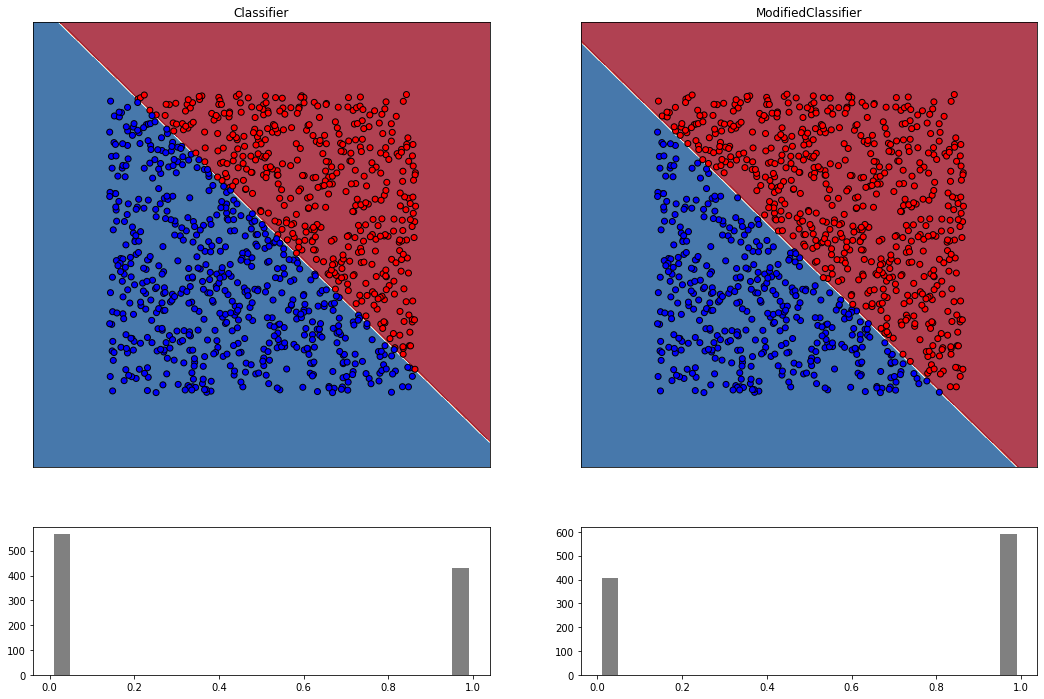

In [4]:
for classifier in classifiers:
    plot_decision_boundaries_and_distributions(classifier, X)

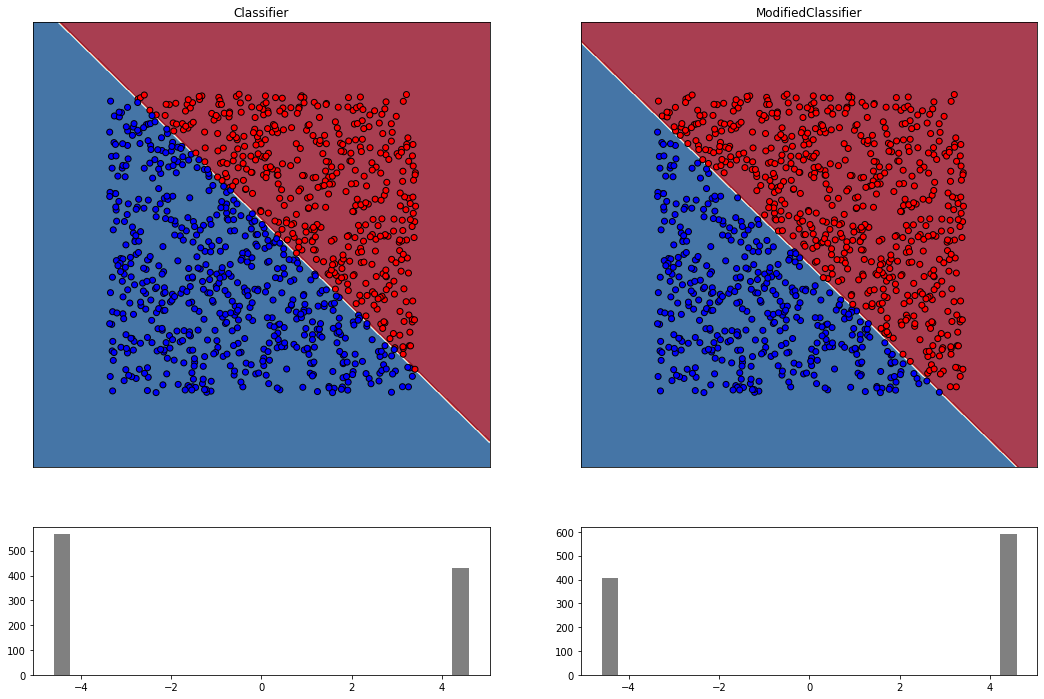

In [5]:
comparers = [
    DifferenceComparer(*classifiers),
    AbsoluteDifferenceComparer(*classifiers),
    ZeroClippedDifferenceComparer(*classifiers),
    ZeroClippedDifferenceComparer(*reversed(classifiers)),
    SumComparer(*classifiers),
    SimilarityComparer(*classifiers),
    DissimilarityComparer(*classifiers),
    DissimilarityComparer(*reversed(classifiers))
]

In [6]:
for comparer in comparers:
    plot_decision_boundaries_and_distributions(comparer, X)

## Generate Explanations

In [9]:
SHAPExplainer.group_name = notebook_name

probability_single_model_explainers = [
    make_shap_explainer(str(classifier), classifier.predict_proba, X, feature_names=feature_names)
    for classifier in classifiers]
log_odds_single_model_explainers = [
    make_shap_explainer(str(classifier) + ' Log Odds', classifier.predict_log_odds, X, feature_names=feature_names)
    for classifier in classifiers]
single_model_explainers = probability_single_model_explainers + log_odds_single_model_explainers

probability_comparison_explainers = [
    make_shap_explainer(str(comparer), comparer.predict_proba, X, feature_names=feature_names)
    for comparer in comparers]
log_odds_comparison_explainers = [
    make_shap_explainer(str(comparer) + ' Log Odds', comparer.predict_log_odds, X, feature_names=feature_names)
    for comparer in comparers]
comparison_explainers = probability_comparison_explainers + log_odds_comparison_explainers

explainers = single_model_explainers + comparison_explainers

Loaded explanation: explanations/Move Decision Boundary Across Two Axes/Classifier.exp
Loaded explanation: explanations/Move Decision Boundary Across Two Axes/ModifiedClassifier.exp
Loaded explanation: explanations/Move Decision Boundary Across Two Axes/Classifier Log Odds.exp
Loaded explanation: explanations/Move Decision Boundary Across Two Axes/ModifiedClassifier Log Odds.exp
Finished generating: explanations/Move Decision Boundary Across Two Axes/Difference of ModifiedClassifier and Classifier.exp (0:00:16.426309)
Finished generating: explanations/Move Decision Boundary Across Two Axes/Absolute Difference of ModifiedClassifier and Classifier.exp (0:00:12.064914)
Loaded explanation: explanations/Move Decision Boundary Across Two Axes/Sum of Classifier and ModifiedClassifier.exp
Loaded explanation: explanations/Move Decision Boundary Across Two Axes/Similarity of Classifier and ModifiedClassifier.exp
Finished generating: explanations/Move Decision Boundary Across Two Axes/Dissimilari

Exact explainer: 1001it [00:16, 28.31it/s]                          
Exact explainer: 1001it [00:12, 11.82it/s]                         
Exact explainer: 1001it [00:11, 11.29it/s]                         
Exact explainer: 1001it [00:11, 11.19it/s]                         
Exact explainer: 1001it [00:12, 14.71it/s]                         
Exact explainer: 1001it [00:12, 14.20it/s]                         
Exact explainer: 1001it [00:12, 14.77it/s]                         
Exact explainer: 1001it [00:12, 14.59it/s]                         


## Analyze

### SHAP Value Distribution

### SHAP Value Distribution

#### Classifier

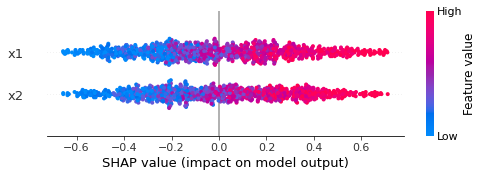

#### ModifiedClassifier

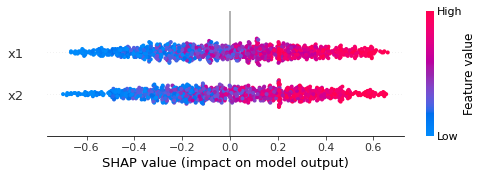

#### Classifier Log Odds

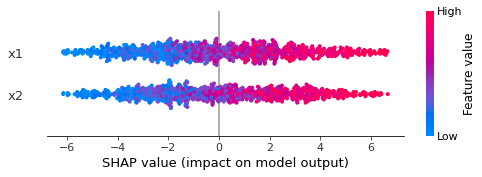

#### ModifiedClassifier Log Odds

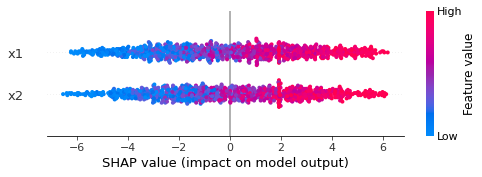

#### Difference of ModifiedClassifier and Classifier

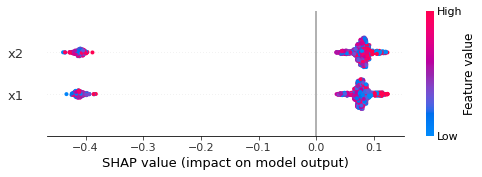

#### Absolute Difference of ModifiedClassifier and Classifier

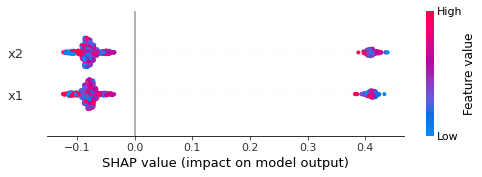

#### Sum of Classifier and ModifiedClassifier

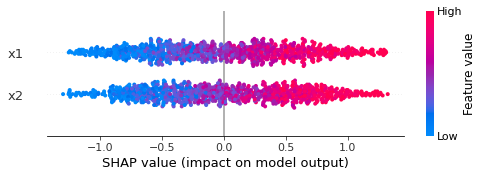

#### Similarity of Classifier and ModifiedClassifier

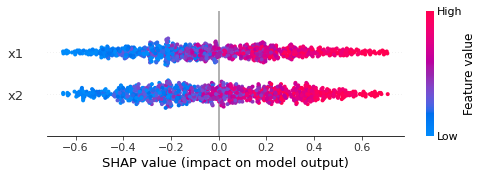

#### Dissimilarity of Classifier and ModifiedClassifier

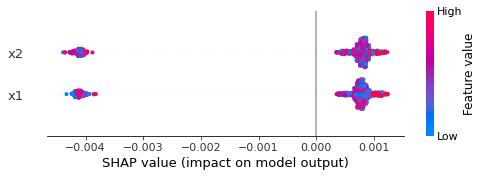

#### Dissimilarity of ModifiedClassifier and Classifier

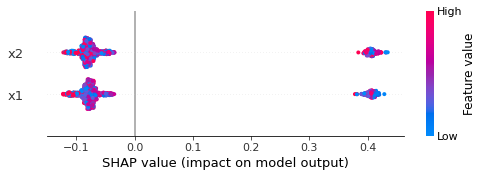

#### Difference of ModifiedClassifier and Classifier Log Odds

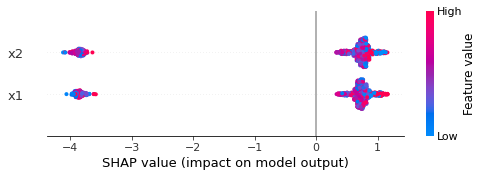

#### Absolute Difference of ModifiedClassifier and Classifier Log Odds

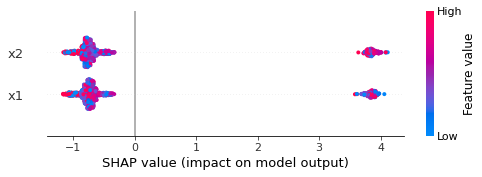

#### Sum of Classifier and ModifiedClassifier Log Odds

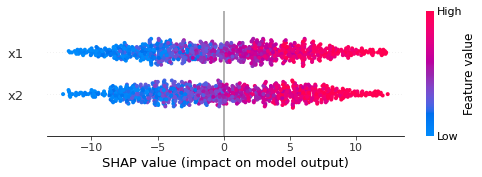

#### Similarity of Classifier and ModifiedClassifier Log Odds

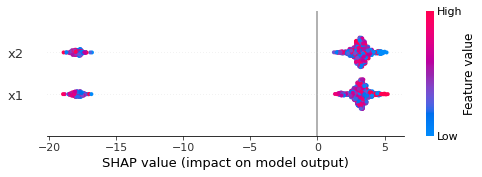

#### Dissimilarity of Classifier and ModifiedClassifier Log Odds

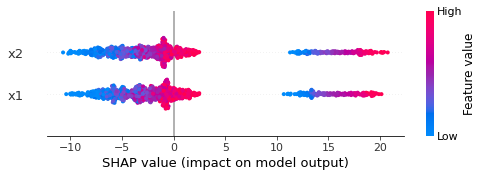

#### Dissimilarity of ModifiedClassifier and Classifier Log Odds

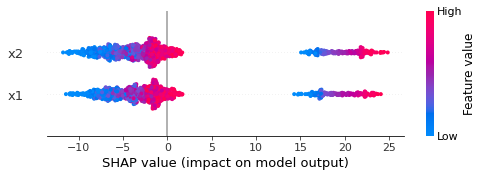

In [10]:
for explainer in explainers:
    plot_shap_value_distribution(explainer)

### Features' Partial Dependence Plots

### Features' Partial Dependence Plots

#### Classifier

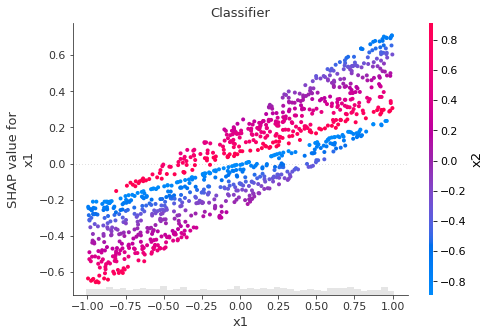

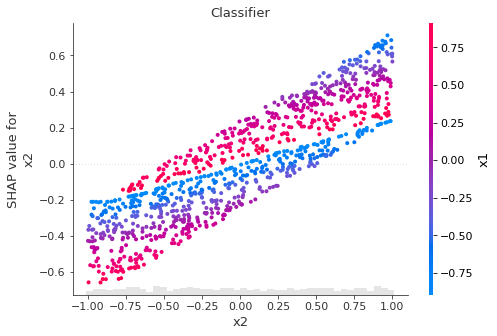

#### ModifiedClassifier

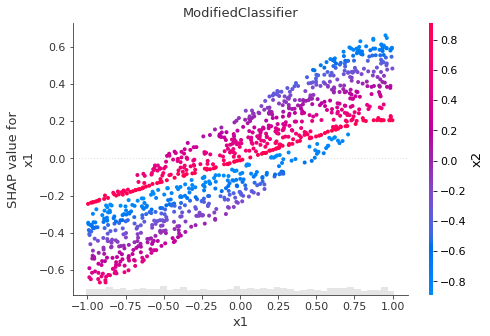

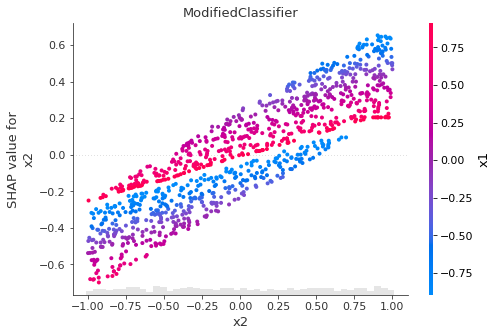

#### Classifier Log Odds

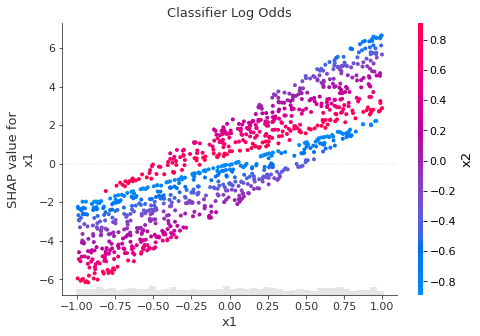

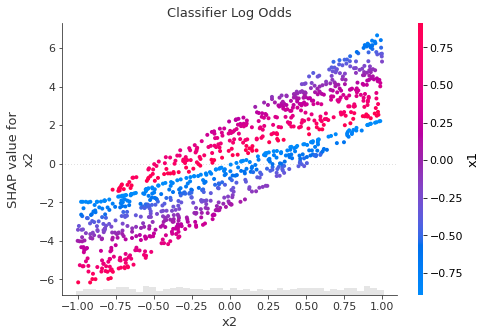

#### ModifiedClassifier Log Odds

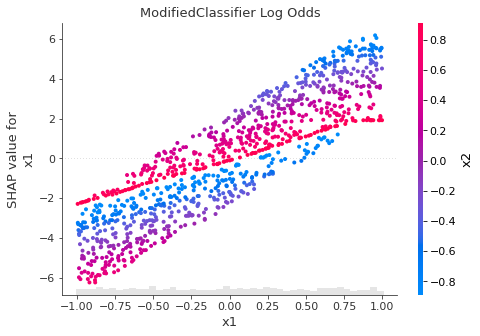

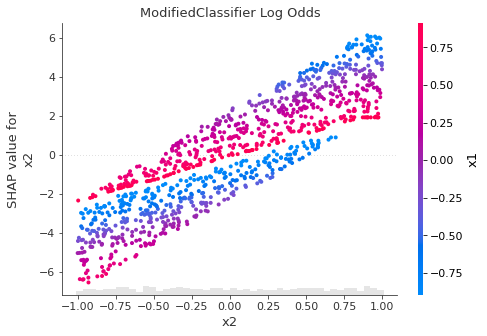

#### Difference of ModifiedClassifier and Classifier

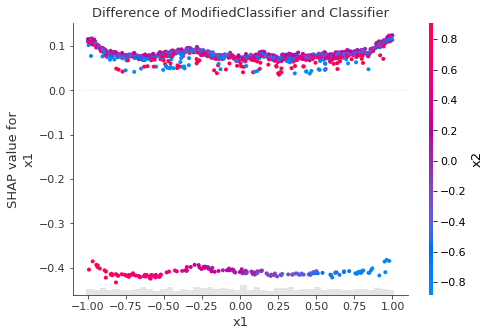

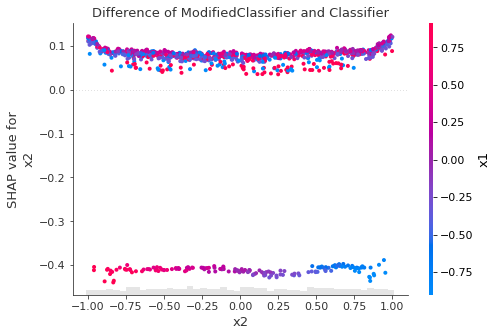

#### Absolute Difference of ModifiedClassifier and Classifier

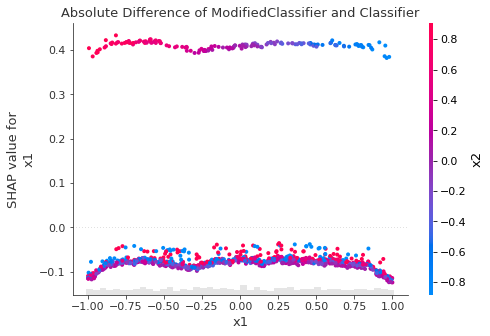

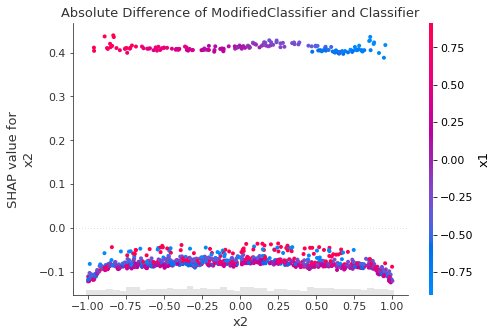

#### Sum of Classifier and ModifiedClassifier

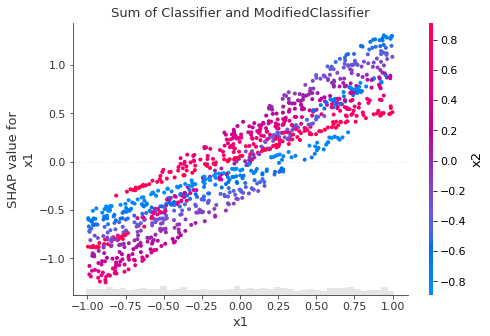

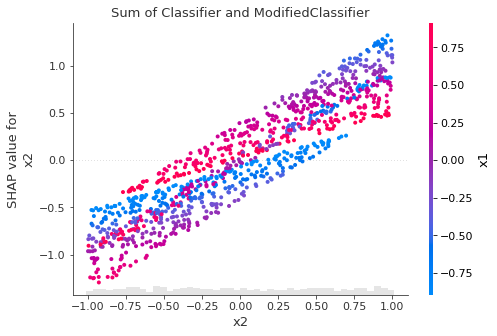

#### Similarity of Classifier and ModifiedClassifier

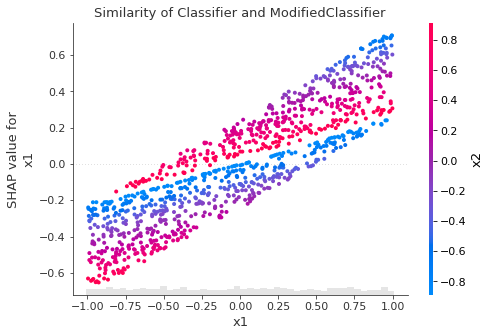

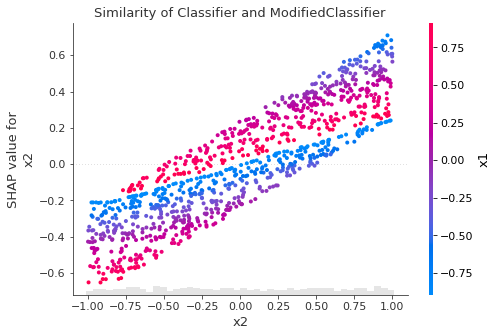

#### Dissimilarity of Classifier and ModifiedClassifier

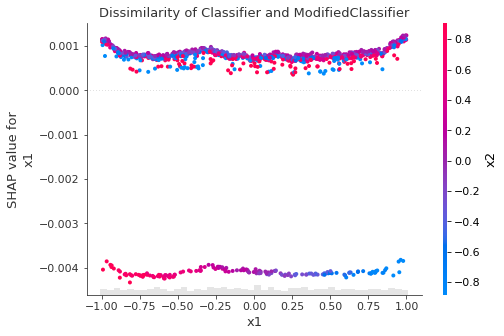

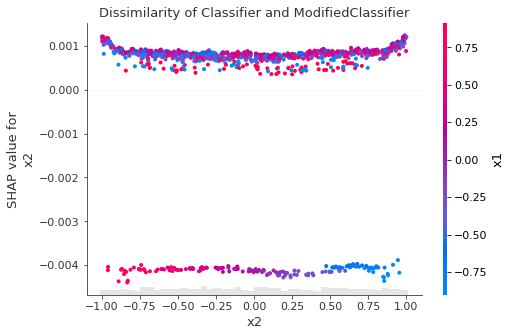

#### Dissimilarity of ModifiedClassifier and Classifier

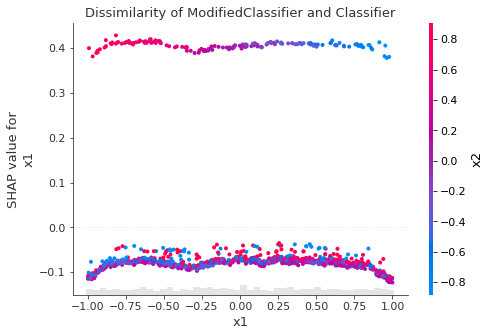

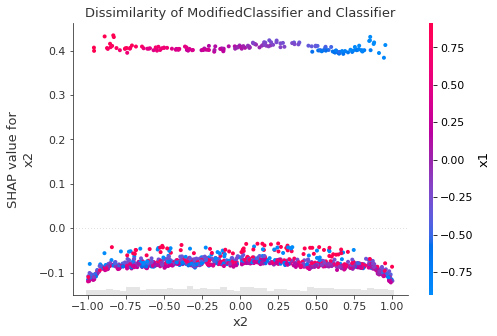

#### Difference of ModifiedClassifier and Classifier Log Odds

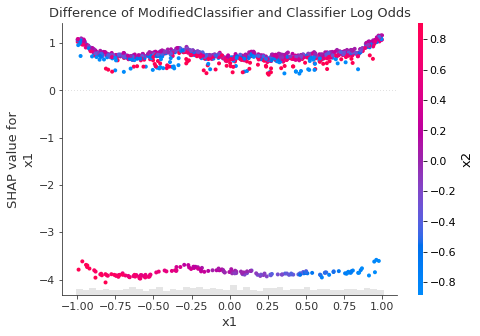

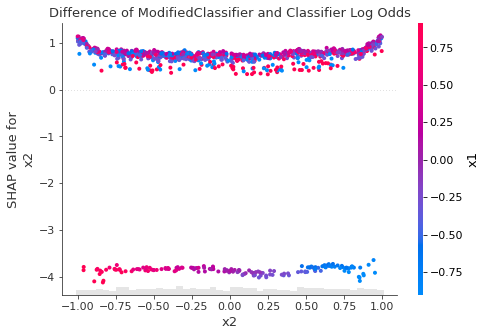

#### Absolute Difference of ModifiedClassifier and Classifier Log Odds

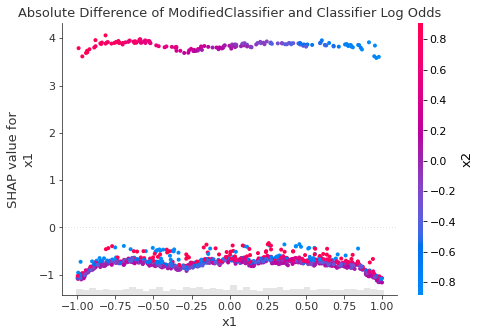

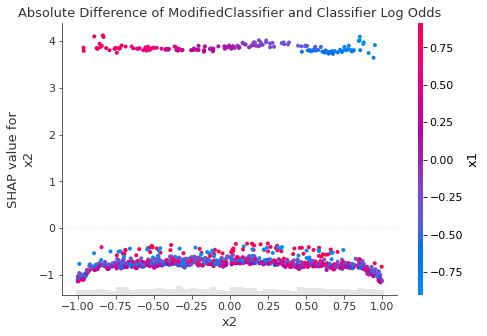

#### Sum of Classifier and ModifiedClassifier Log Odds

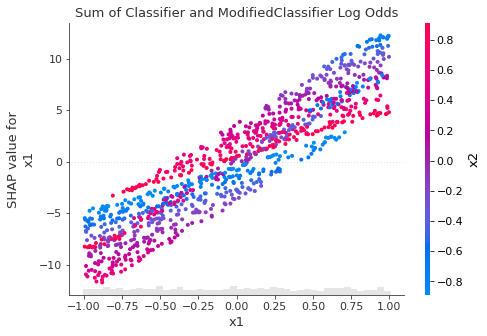

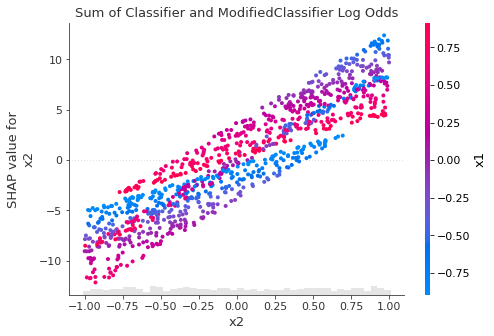

#### Similarity of Classifier and ModifiedClassifier Log Odds

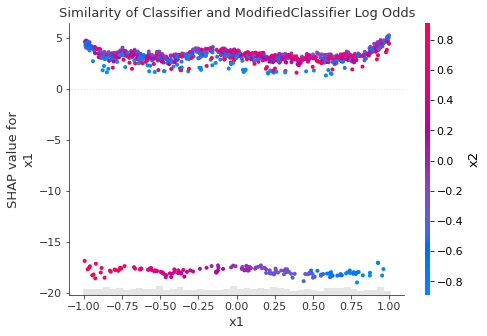

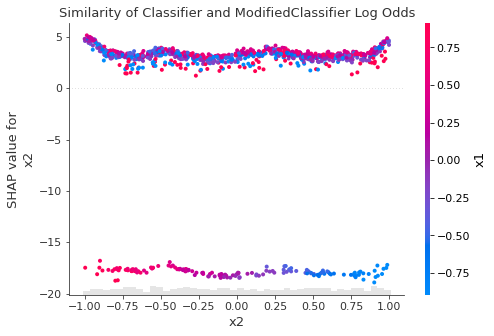

#### Dissimilarity of Classifier and ModifiedClassifier Log Odds

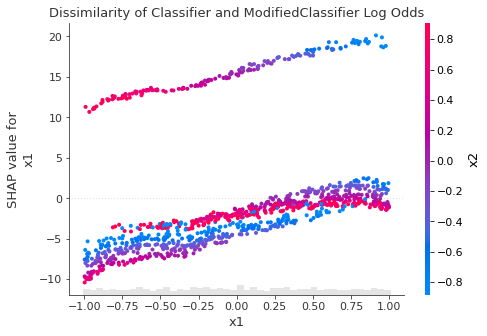

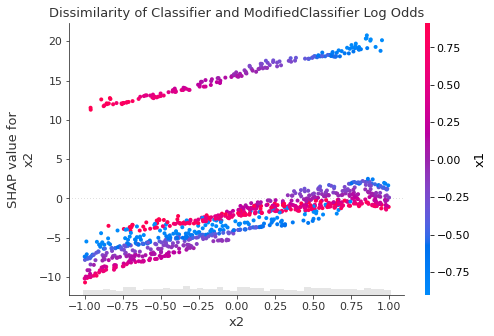

#### Dissimilarity of ModifiedClassifier and Classifier Log Odds

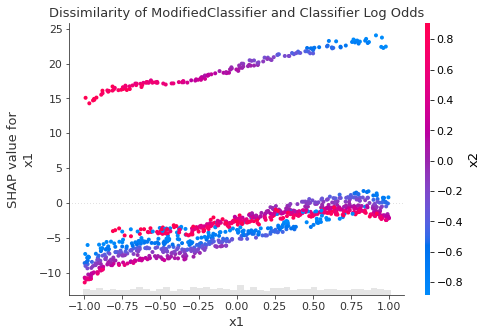

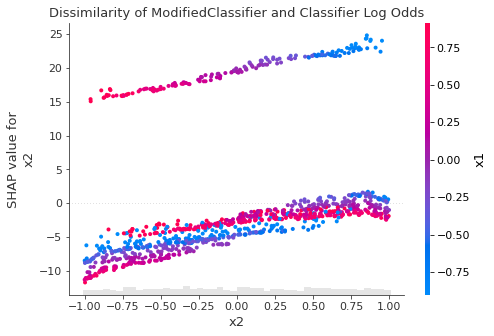

In [11]:
for explainer in explainers:
    plot_shap_partial_dependence(explainer)

### Stacked SHAP Explanations, Clustered by Similarity

In [12]:
plot_shap_values_stacked(*probability_single_model_explainers)
plot_shap_values_stacked(*log_odds_single_model_explainers)

for explainer in comparison_explainers:
    plot_shap_values_stacked(explainer)

### Stacked SHAP Explanations, Clustered by Similarity

#### Classifier

#### ModifiedClassifier

#### Classifier Log Odds

#### ModifiedClassifier Log Odds

#### Difference of ModifiedClassifier and Classifier

#### Absolute Difference of ModifiedClassifier and Classifier

#### Sum of Classifier and ModifiedClassifier

#### Similarity of Classifier and ModifiedClassifier

#### Dissimilarity of Classifier and ModifiedClassifier

#### Dissimilarity of ModifiedClassifier and Classifier

#### Difference of ModifiedClassifier and Classifier Log Odds

#### Absolute Difference of ModifiedClassifier and Classifier Log Odds

#### Sum of Classifier and ModifiedClassifier Log Odds

#### Similarity of Classifier and ModifiedClassifier Log Odds

#### Dissimilarity of Classifier and ModifiedClassifier Log Odds

#### Dissimilarity of ModifiedClassifier and Classifier Log Odds

### Hierarchically Clustered SHAP Values

### Hierarchically Clustered SHAP Values

#### Classifier

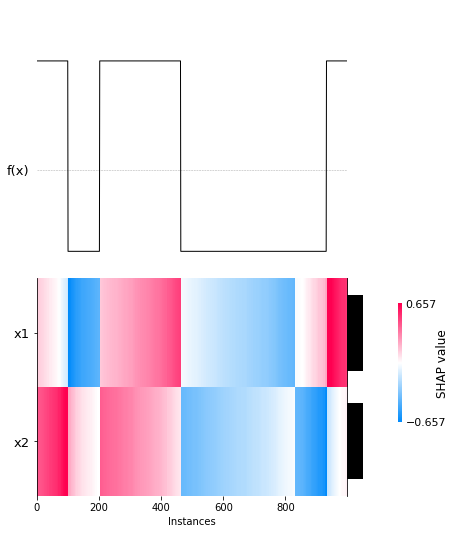

#### ModifiedClassifier

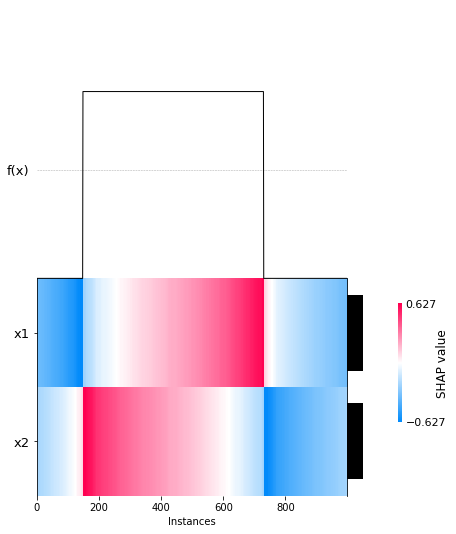

#### Classifier Log Odds

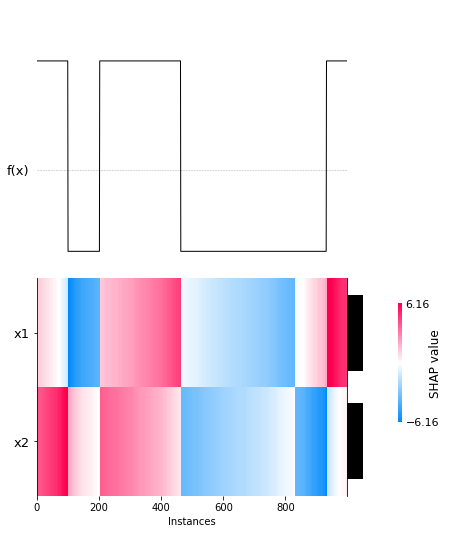

#### ModifiedClassifier Log Odds

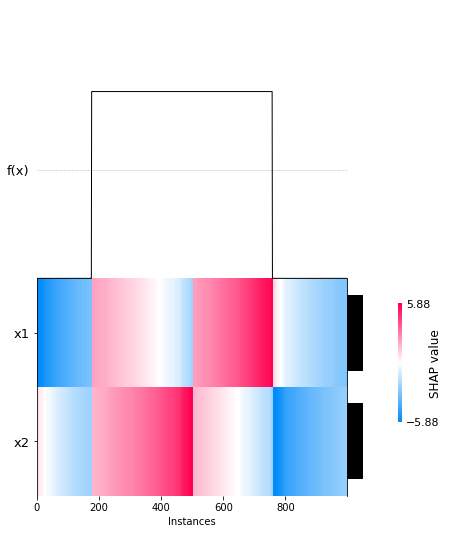

#### Difference of ModifiedClassifier and Classifier

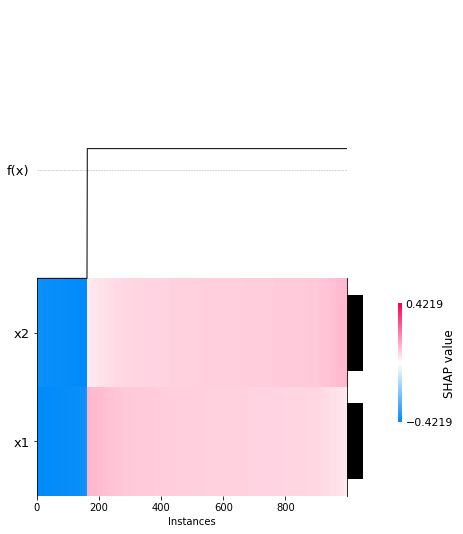

#### Absolute Difference of ModifiedClassifier and Classifier

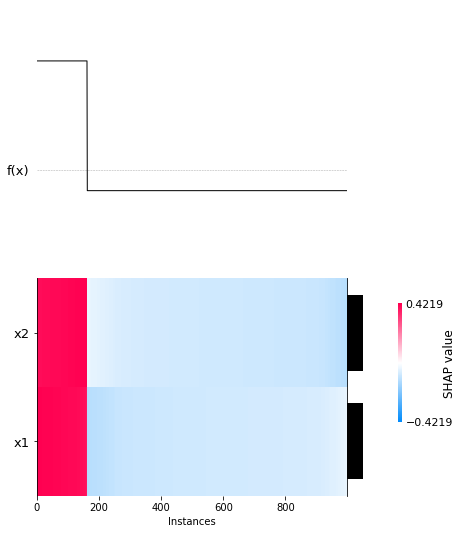

#### Sum of Classifier and ModifiedClassifier

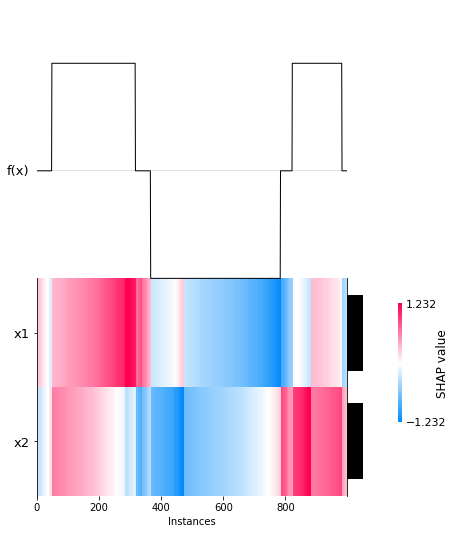

#### Similarity of Classifier and ModifiedClassifier

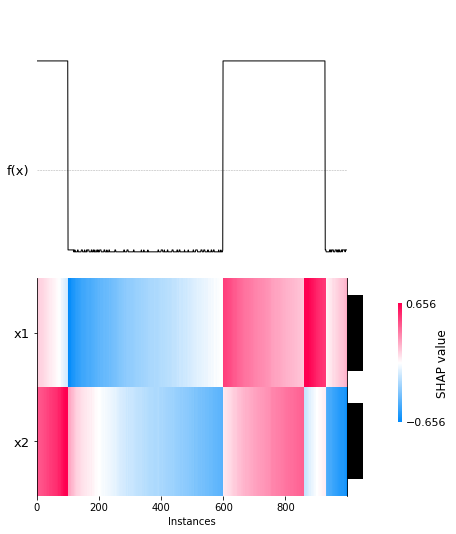

#### Dissimilarity of Classifier and ModifiedClassifier

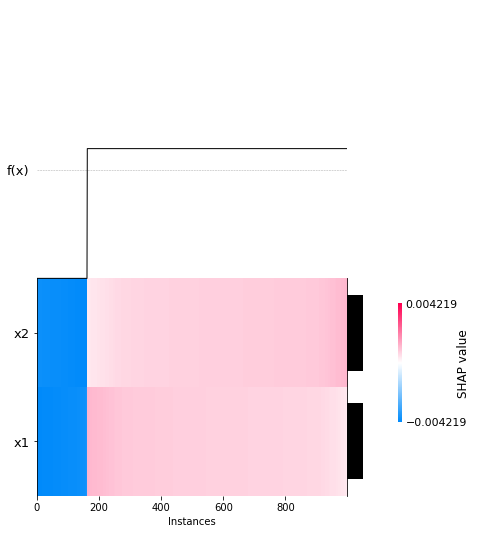

#### Dissimilarity of ModifiedClassifier and Classifier

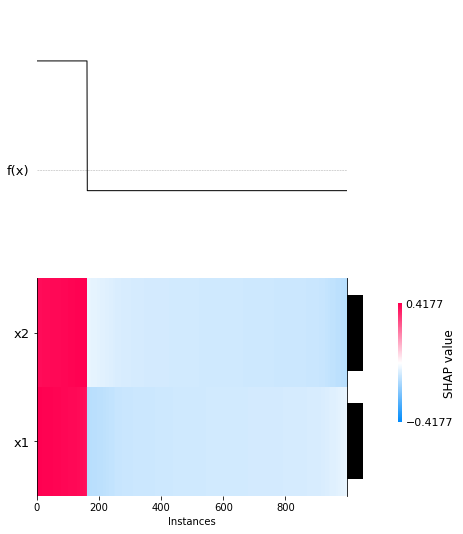

#### Difference of ModifiedClassifier and Classifier Log Odds

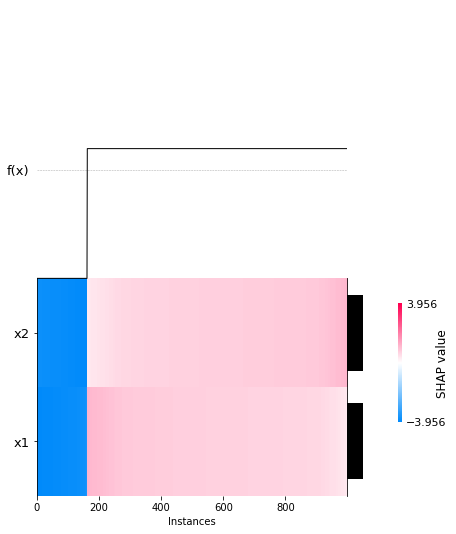

#### Absolute Difference of ModifiedClassifier and Classifier Log Odds

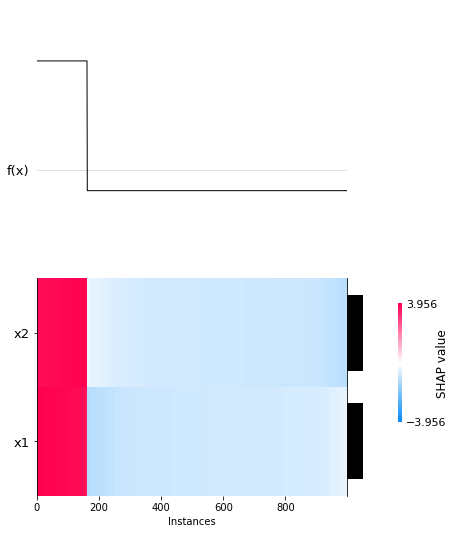

#### Sum of Classifier and ModifiedClassifier Log Odds

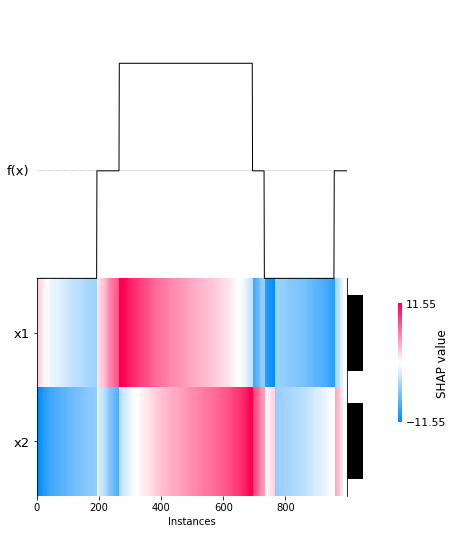

#### Similarity of Classifier and ModifiedClassifier Log Odds

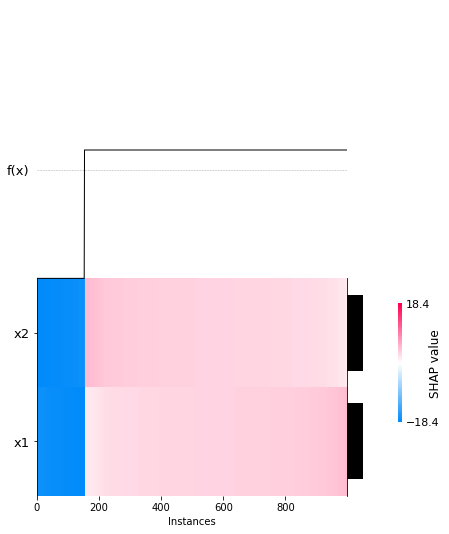

#### Dissimilarity of Classifier and ModifiedClassifier Log Odds

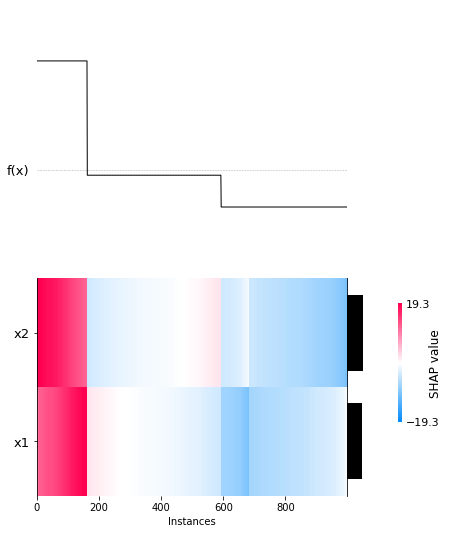

#### Dissimilarity of ModifiedClassifier and Classifier Log Odds

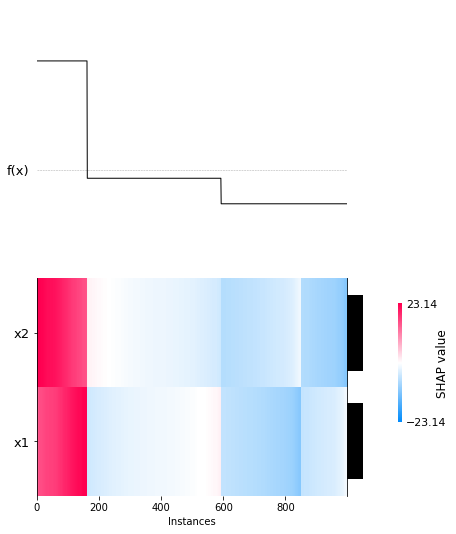

In [13]:
for explainer in explainers:
    plot_shap_values_hierarchically_clustered(explainer)
